# Multi-Linear Regression (Advertsing dataset)

In [1]:
#Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load "Advertising.csv" file
df=pd.read_csv('Advertising.csv')

In [3]:
#To show first 20 records
df.head(20)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df.shape  # to show no. of rows and columns

(200, 5)

# Perform EDA

In [5]:
#to remove unwanted column permanently from df
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
#check
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
#check null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
#To show details of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
#here Dataset is completely clean
#So,no need to perform EDA

# Multiple Linear Regression (MLR)

In [10]:
#Perform modelling with Multiple Linear Regression (MLR)
#All three input variables(columns) together in X-axis and output in Y-axis
X=df[["TV","radio","newspaper"]] #input [[]] 2D array means many input
#here X input variables means independent variables
Y=df["sales"]#here Y target means dependent variable (1D)

In [11]:
#train_test_split() : inbuilt  function It is used to split dataset 
#into training and testing , 70% data use in training and 30% data used in
#testing
#train_test_split()  : this function define in inbuilt class
#train_test_split class
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [13]:
#we train the model with the help of LinearRegression class
from sklearn.linear_model import LinearRegression

In [14]:
#create the object of LinearRegression
lr=LinearRegression()

In [15]:
#we train the model : use fit() inbuilt function of LinearRegression class
#fit() passing arguments/parameters which pass input and labeeled output(70%)
lr.fit(X_train,Y_train)

LinearRegression()

In [16]:
#Test the model means use inbuilt function predict()  : inbuilt method of
#LinearRegression class
#perform testing
y_pred=lr.predict(X_test) 

In [17]:
y_pred

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

In [18]:
#slope means coefficient use inbuilt method coef_ : of LinearRegression class
lr.coef_  #to show slope means coefficient   y=m1x1+m2x2+m3x3+b

array([0.04695205, 0.17658644, 0.00185115])

In [19]:
#Intercept_ inbuilt method of LinearRegression class
lr.intercept_

2.937215734690609

In [20]:
#find mean squared error =Residual sum of squared error/no. of datapoints N
#RSS : Residual sum of squared error =sum(original output-predicted output)^2
from sklearn.metrics import mean_squared_error

In [21]:
MSE=mean_squared_error(Y_test,y_pred)#mean_squared_error() inbuilt function
#which define in inbuilt class mean_squared_error , it is passing arguments
#type function
print("Mean_Squared_Error : ",MSE)

Mean_Squared_Error :  1.9289249074665729


In [22]:
#Evaluation of model, find r2-score =(TSS-RSS)/TSS
#r2-score inbuilt class
from sklearn.metrics import r2_score

In [23]:
score=r2_score(Y_test,y_pred)
print("R2-score : ",score)  #range of r2-score :   0 to +1  
# it is very good score because nearest to +1

R2-score :  0.9224605706201435


# Assumptions of Linear Regression

In [24]:
#Let's check Assumptions of Linear Regression : -
'''1. should not be Multicolinearity in linear regression  '''

'1. should not be Multicolinearity in linear regression  '

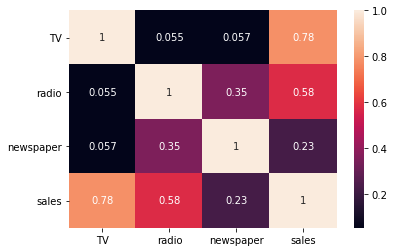

In [25]:
#checking the relationship of input columns means independent variables with output means target variable sales 
#check correlation of each input with output and also check each input with each other  use inbuilt method corr()
#we visualise corr()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [26]:
#correlation values with TV and sales=0.78 , It is very good
#correlation values with radio and sales=0.58 , It is good(ok)
#correlation values with newspaper and sales=0.23 , It is very bad

In [27]:
#observation : Good correlation of output with TV and slightly with radio

In [28]:
# Multicolinearity means here radio(I/P) and newspaper (I/P) is correlated corr value0.35 
#that means indirectly newspaper and radio also getting corelated with sales(o/p)
#here correlation with newspaper and sales =0.23 it is bad correlation
#So in this case , remove any one input(radio and newspaper)but which input will be remove so we remove those input
#whose bad correlation with output here newspaper is bad correlated with output sales then remove newspaper 
#column means newspaper column input is not imp to predict the value of sales(o/p)

In [29]:
#corr value of radio with sales :  0.58  
#corr value of newspper with sales : 0.23
#corr value of radio and newspaper(both are input and correlated each other:0.35
#so we decided , remove newspaper because corr of radio with sales>newspaper with sales
#We have input TV and radi and target sales
X=df[["TV","radio"]] #input TV and radio : 2D array
Y=df["sales"] #output which want to predict : always 1 D array

In [30]:
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [31]:
#create the object of LinearRegression
lr=LinearRegression()

In [32]:
#we train the model : use fit() inbuilt function of LinearRegression class
#fit() passing arguments/parameters which pass input and labeeled output(70%)
lr.fit(X_train,Y_train)

LinearRegression()

In [33]:
#Test the model means use inbuilt function predict()  : inbuilt method of
#LinearRegression class
#perform testing
y_pred=lr.predict(X_test) #y_pred=m1*x_test_TV+m2*x_test_radio+b

In [34]:
#check slope means coefficient use inbuilt method coef_ : of LinearRegression class
lr.coef_  #to show slope means coefficient   y=m1*TV+m2*radio+b
#remain same as previous if remove input newspaper 
#means no any effect of newspaper for prediction of sales

array([0.04697554, 0.17765046])

In [35]:
# check Intercept_ inbuilt method of LinearRegression class
lr.intercept_   #remains same as previous

2.9647671191401574

In [36]:
MSE=mean_squared_error(Y_test,y_pred)#mean_squared_error() inbuilt function
#which define in inbuilt class mean_squared_error , it is passing arguments
#type function
print("Mean_Squared_Error : ",MSE)

Mean_Squared_Error :  1.9147050289721788


In [37]:
score=r2_score(Y_test,y_pred)
print("R2-score : ",score)  #range of r2-score :   0 to +1  
# it is very good score because nearest to +1

R2-score :  0.9230321850256801


In [38]:
#here r2-score is best because nearest to +1 and MSE is very low means we have created a successful model 
#So, we removed the Multicolinearity situation

In [39]:
#2. Assumption :  Linear relationship means There should be a linear relationship. 

In [40]:
'''we cannot see 3D graph on system so we have some hack(trick) , how to 
 check input and output both are related or not
 we calculate the residual (this is error means) of each datapoint 
 Residual =(actual output-predicted output)
 '''

'we cannot see 3D graph on system so we have some hack(trick) , how to \n check input and output both are related or not\n we calculate the residual (this is error means) of each datapoint \n Residual =(actual output-predicted output)\n '

In [41]:
#find the residuals 
residuals=Y_test-y_pred
print(residuals)

58     2.121325
40     0.161080
34     1.790963
102   -3.121584
184   -1.071115
198    1.751649
95     0.650372
4     -0.476570
29     1.376352
168   -0.175850
171    0.094861
18     1.442691
11     0.085973
89     0.085626
110   -1.628579
118    0.475105
159    0.479785
35    -4.548925
136   -1.595709
59     0.296797
51     1.313444
16    -0.151716
44    -0.209470
94     1.002953
31     0.540576
162   -0.130433
38     0.367320
28    -0.566610
193    1.338393
27    -1.310358
47     1.593306
165   -2.684544
194    0.978638
177   -0.645678
176    0.201464
97     0.118795
174   -2.516140
73     0.943990
69     1.352080
172    0.143738
108    1.648793
107    1.435349
189    0.707220
14     0.602824
56    -2.799666
19     0.469889
114   -0.352296
39     1.127387
185    1.993211
124    0.216236
98     1.311803
123    0.305838
119   -0.118500
53     1.450047
33    -1.594481
179    0.079578
181   -1.988236
106    1.106689
199   -1.995585
138    0.014138
Name: sales, dtype: float64


In [42]:
print(y_pred)

[21.6786746  16.43892004  7.70903733 17.92158421 18.67111499 23.74835071
 16.24962798 13.37657045  9.12364788 17.27585015 14.40513872  9.85730919
 17.31402746 16.61437382 15.02857874 15.42489496 12.42021473 17.34892466
 11.09570896 18.10320281  9.38655615 12.65171582  8.70947008 10.49704698
 11.35942404 15.03043294  9.73268033 19.46660993 18.26160716 17.21035792
 21.60669421 14.58454377 16.32136242 12.3456783  19.99853614 15.38120487
 14.01613968 10.05601014 20.94792024  7.45626202  3.65120693  7.26465144
  5.99278035 18.39717578  8.2996665  14.13011074 14.95229617 20.37261349
 20.60678937 19.48376432 24.08819667 14.89416249  6.71850002 19.74995269
 18.99448081 12.52042181 14.18823598  6.09331077 15.39558485  9.58586241]


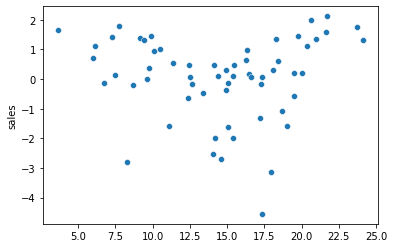

In [43]:
#visualize scatterplot between y_pred and residuals means 
#here input x=y_pred  and y=residuals because residuals depend on y_pred value
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

In [44]:
# in above scatterplot, This is not a linear relation means this assumption not fullfill

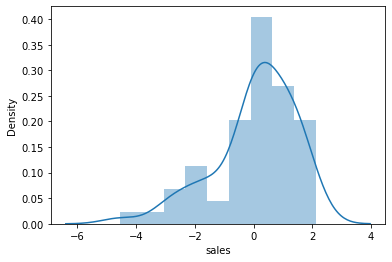

In [45]:
#3 Assumption of linear regression : - Residuals should be normally distributed
#curve means data should be euqally divide on both sides.
#normal distributed curve then use inbuilt function displot() of seaborn
#library ,distplot is also known as frequency graph
plt.figure()
sns.distplot(residuals)
plt.show()

In [46]:
#In above distplot curve , -ve skewness found means no normal distributed curve
#found means it is a as-symmetric curve means this assumption is not fullfill

In [47]:
#find skewness :- if skew=0 then found normal distributed curve means 
#symmetric curve or bell shaped curve
#if skew!=0 then found as-symmetric curve means no normal distributed curve

In [48]:
from scipy.stats import skew
print("skew ness : ",skew(residuals))

skew ness :  -1.065988117969208


In [49]:
#4. Assumption of linear regression : -
#relation should be HOMOSKEDAStik : means datapoints are closely each other
#should not by Heteroskedastic  means should not be scattered
#if linear relationship occurs

In [50]:
#here we handled multicolinearity (removed multicolinearity (problem) but not working 3 assumption 
# no linear relationship  
#create a curve but no normal distributed curve

In [51]:
#So we increase the degress of X means increase the power of X means independent vairable
#if increasing the degree or power of independent variable then It is called
#polynomial Linear regression(PLR)

# Polynomial Linear Regression 

In [52]:
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=3
#here we have 2 inputs : - X=TV,radio means X1="TV" and X2="radio"

In [53]:
#call PolynomialFeatures inbuilt class 
from sklearn.preprocessing import PolynomialFeatures

In [54]:
#select X and Y variables
X=df[["TV","radio"]]
Y=df["sales"]

In [55]:
#create the object of PolynomialFeatures
pf=PolynomialFeatures(3)#here 3 means pass degree means how much degree/power
#of X

In [56]:
#we create polynomial version of X so we call fit_transform() : inbuilt
#method of PolynomialFeatures class
X_poly=pf.fit_transform(X)  #m1*TV**2+m2*TV**1+m3*radio**2+m4*radio**1+b

In [57]:
#train_test_split() means 70%,30%
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [58]:
#create the object of LinearRegression class
lr=LinearRegression()

In [59]:
#we train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [60]:
#we testing the model
y_pred=lr.predict(X_test)

In [61]:
#check mean_squared_error
MSE=mean_squared_error(Y_test,y_pred)#mean_squared_error() inbuilt function
#which define in inbuilt class mean_squared_error , it is passing arguments
#type function
print("Mean_Squared_Error : ",MSE)

Mean_Squared_Error :  0.1446907864615957


In [62]:
#MSE error is very less means model is great

In [63]:
#Evaluation of model 
score=r2_score(Y_test,y_pred)
print("R2-score : ",score)  #range of r2-score :   0 to +1 
#it is very good score because nearest to +1 

R2-score :  0.9941836818139852


In [64]:
#Great r2-score

In [65]:
#work on assumption 
#create the Normal distributed curve with the help of residuals
#find residuals
residuals=Y_test-y_pred

skew ness :  0.06955995112529977


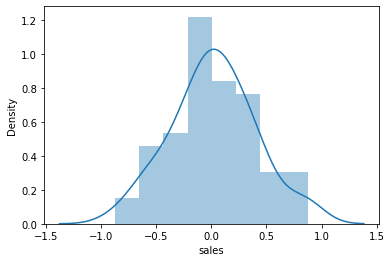

In [66]:
#3 Assumption of linear regression : - Residuals should be normally distributed
#curve means data should be euqally divide on both sides.
#normal distributed curve then use inbuilt function displot() of seaborn
#library ,distplot is also known as frequency graph
print("skew ness : ",skew(residuals))
plt.figure()
sns.distplot(residuals)
plt.show()

In [67]:
#here got Normal distributed curve means this assumption of linear regression 
#is fullfill

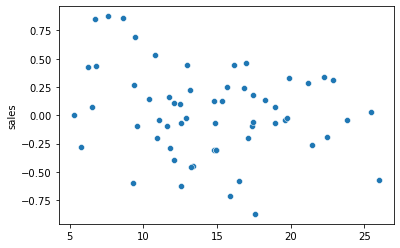

In [68]:
#Work on next assumption of linear regression
# there should be linear relationship
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

In [69]:
#here this is linear relation ship between residuals and y_pred 
#means input and output are related to each other
#but datpoints are scattered means heteroskadastic 